In [1]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim
#import ggplot
import seaborn as sns
import spacy
import logging
import warnings
import json
import logging
import os
import pyLDAvis.gensim
import matplotlib as mpl
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.lang.en import English

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\PythonInstall\lib\site-packages\bokeh\plotting\helpers.py:21: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, OrderedDict, Sequence
C:\PythonInstall\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

import matplotlib.colors as mcolors
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.lang.en import English

In [3]:
# Import Dataset
df1 = pd.read_json("Mckinsey_Articles.json")
print(df1.shape)
df1.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...


In [4]:
df2=df1[df1['body'] != "NaN"]
print(df2.shape)
df2.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...


In [5]:
df=df1[df1['body'] != ""]
print(df.shape)
df.head(215)

(194, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...
5,December 2019,Article,https://www.mckinsey.com/industries/healthcare...,Zahy Abou-Atme,enrollment in provider-led health plans (PLHP...,\r\n\t\t\t\t\t\tHow should provider-led health...
6,October 2019,Interview,https://www.mckinsey.com/industries/healthcare...,Erica Coe,"Michael, it’s great to be speaking with you t...",\r\n\t\t\t\t\t\tWhy social determinants matter...
7,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,is a senior partner in McKinsey’s London offi...,\r\n\t\t\t\t\t\tFit for the future: The common...
8,November 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"In 2017, total healthcare spending accounted f...",\r\n\t\t\t\t\t\tGetting the right care to the ...
9,November 2019,Article,https://www.mckinsey.com/industries/public-sec...,Naufal Khan,are the enabling technology behind state-leve...,\r\n\t\t\t\t\t\tInsights into better integrate...
11,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Today, I’m joined by Dr. Jim Weinstein, who i...",\r\n\t\t\t\t\t\tPicking winning strategies to ...


In [6]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.body.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['healthcare', 'is', 'an', 'essential', 'dynamic', 'and', 'opportunity', 'rich', 'industry', 'the', 'demand', 'for', 'innovation', 'to', 'drive', 'simultaneous', 'improvement', 'in', 'health', 'outcomes', 'affordability', 'quality', 'and', 'access', 'will', 'continue', 'to', 'be', 'high', 'as', 'we', 'look', 'ahead', 'we', 'suggest', 'keeping', 'an', 'eye', 'on', 'the', 'following', 'seven', 'trends', 'multiple', 'forces', 'including', 'the', 'mitigation', 'of', 'additional', 'funding', 'from', 'the', 'affordable', 'care', 'act', 'are', 'combining', 'to', 'form', 'headwinds', 'against', 'profit', 'pool', 'growth', 'in', 'healthcare', 'new', 'business', 'models', 'that', 'create', 'significant', 'healthcare', 'value', 'that', 'is', 'substantially', 'better', 'cost', 'quality', 'and', 'outcomes', 'will', 'be', 'critical', 'and', 'are', 'emerging', 'for', 'example', 'payers', 'reimagining', 'the', 'next', 'generation', 'managed', 'care', 'model', 'with', 'meaningful', 'engagement', 'in',

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

from spacy.lang.en import English

#!python -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [8]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.024*"lean" + 0.016*"people" + 0.013*"time" + 0.012*"work" + '
  '0.012*"company" + 0.009*"leadership" + 0.008*"woman" + 0.008*"customer" + '
  '0.007*"look" + 0.007*"year"'),
 (1,
  '0.021*"plan" + 0.013*"consumer" + 0.013*"market" + 0.011*"contract" + '
  '0.011*"year" + 0.010*"network" + 0.010*"exhibit" + 0.009*"state" + '
  '0.009*"performance" + 0.009*"rating"'),
 (2,
  '0.012*"value" + 0.011*"company" + 0.009*"new" + 0.009*"service" + '
  '0.009*"healthcare" + 0.008*"health" + 0.006*"provider" + 0.006*"system" + '
  '0.006*"example" + 0.006*"datum"'),
 (3,
  '0.045*"care" + 0.036*"patient" + 0.026*"health" + 0.022*"system" + '
  '0.022*"hospital" + 0.015*"provider" + 0.012*"clinical" + 0.010*"case" + '
  '0.008*"quality" + 0.008*"cost"')]


In [9]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7118,"value, company, new, service, healthcare, heal...","[essential, dynamic, opportunity, rich, indust..."
1,1,3.0,0.5006,"care, patient, health, system, hospital, provi...","[possible, cheaply, quickly, sequence, genome,..."
2,2,2.0,0.8075,"value, company, new, service, healthcare, heal...","[today, join, manage, director, capital, inves..."
3,3,3.0,0.4777,"care, patient, health, system, hospital, provi...","[much, join, today, hope, focus, role, base, s..."
4,4,1.0,0.5113,"plan, consumer, market, contract, year, networ...","[enrollment, provider, lead, health, plan, plh..."
5,5,3.0,0.5890,"care, patient, health, system, hospital, provi...","[speak, today, critical, topic, give, percent,..."
6,6,1.0,0.8383,"plan, consumer, market, contract, year, networ...","[member, mckinsey, publishing, base]"
7,7,0.0,0.4682,"lean, people, time, work, company, leadership,...","[total, healthcare, spending, account, percent..."
8,8,2.0,0.8005,"value, company, new, service, healthcare, heal...","[enable, technology, state, level, service, pr..."
9,9,3.0,0.4090,"care, patient, health, system, hospital, provi...","[today, join, serve, system, discuss, perspect..."


In [10]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.6658,"lean, people, time, work, company, leadership, woman, customer, look, year","[send, letter, employee, diversity, strength, work, closely, team, build, set, process, follow, ..."
1,1.0,0.9986,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[release, star_rating, give, multiple, source, volatility, market, include, recent, election, re..."
2,2.0,0.9994,"value, company, new, service, healthcare, health, provider, system, example, datum","[ambitious, vision, digitization, transform, core, business, service, industry, vision, typicall..."
3,3.0,0.9526,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[base, responsible, hospital, include, nationally, rank, nearly, health, center, clinic, follow,..."


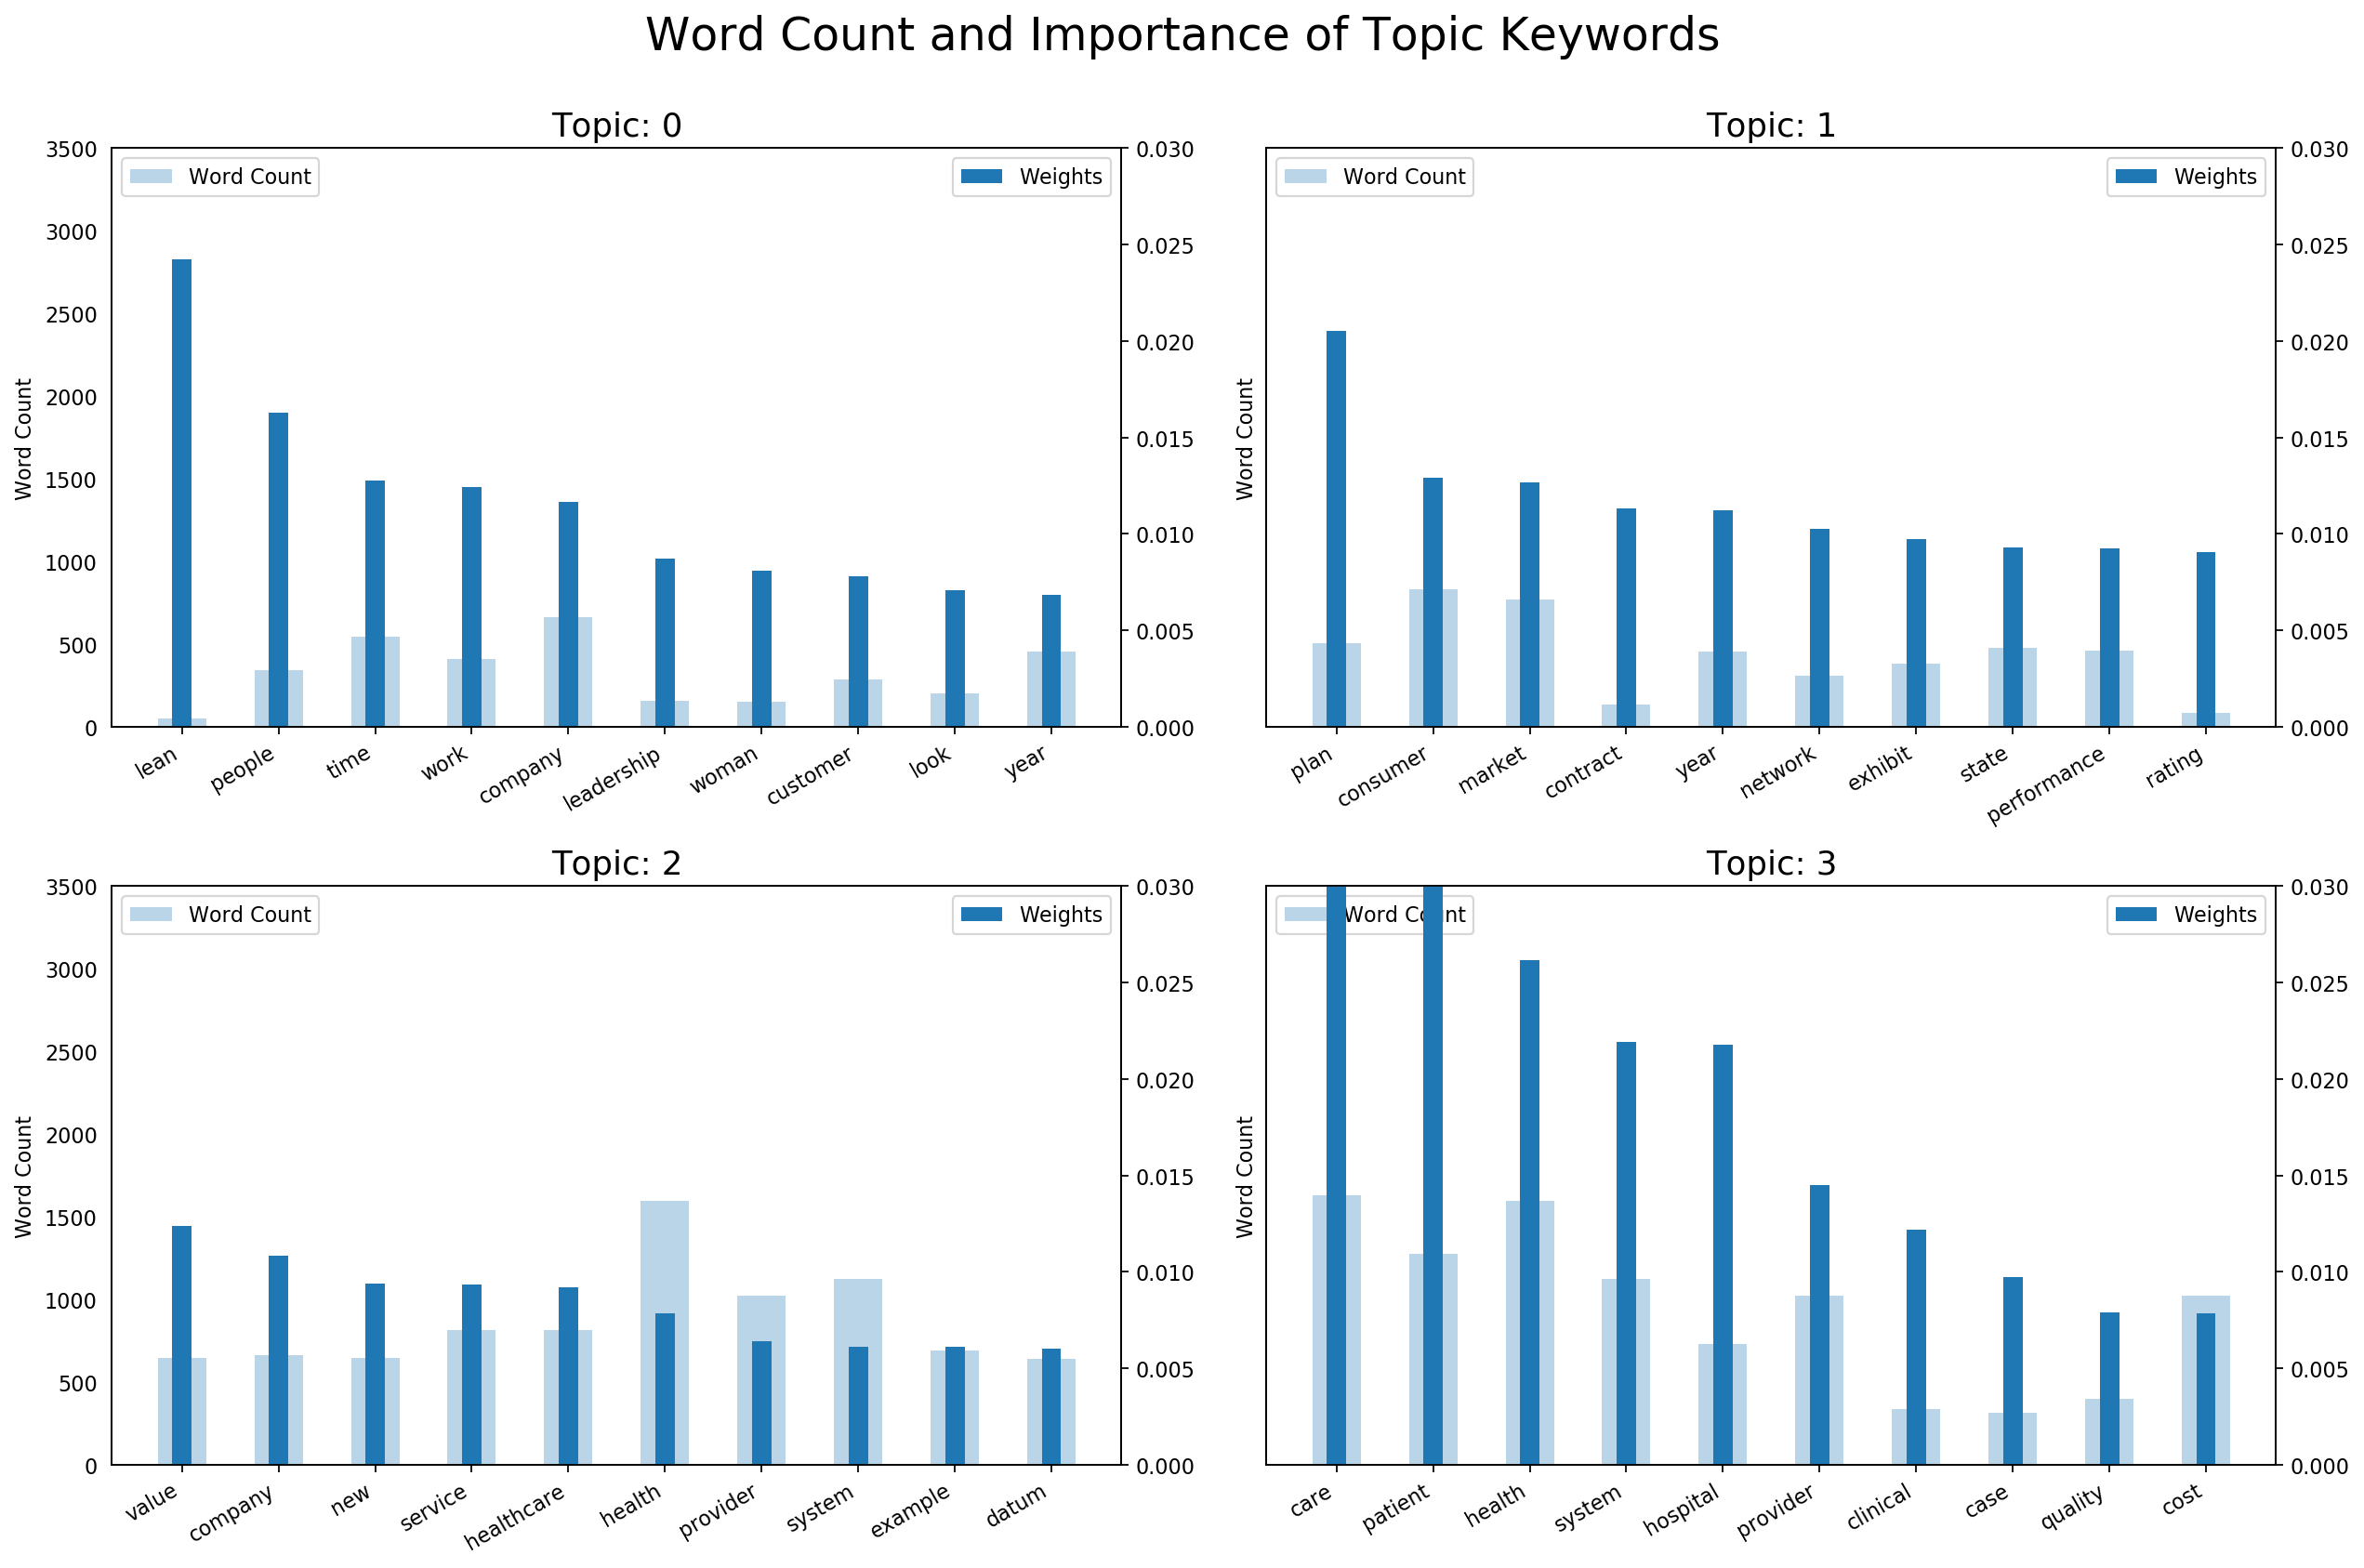

In [11]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], width=0.2, label='Weights')
    ax.set_ylabel('Word Count')
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [12]:
#Establishes dfkey as the dataframe for keywords
dfkey=df
dfkey

,word,topic_id,importance,word_count
0,lean,0,0.024221,51
1,people,0,0.016289,344
2,time,0,0.012750,545
3,work,0,0.012454,409
4,company,0,0.011642,661
5,leadership,0,0.008746,157
6,woman,0,0.008106,150
7,customer,0,0.007817,289
8,look,0,0.007089,205
9,year,0,0.006824,456


In [13]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

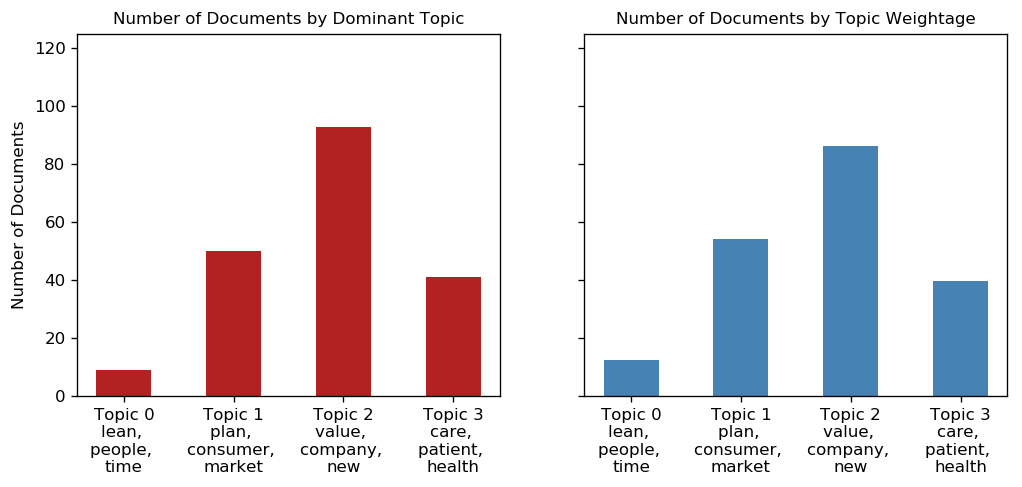

In [14]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 125)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [15]:
df_dominant_topic['Year']= df1['Article_date']
df_dominant_topic.sort_values(by=['Year'],inplace=True, ascending=True)
df_dominant_topic['Year'] =  pd.to_datetime(df_dominant_topic['Year'], format='%B %Y', errors='coerce').dt.year
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Year
18,18,2.0,0.3565,"value, company, new, service, healthcare, health, provider, system, example, datum","[hospital, system, patient, satisfaction, likely, become, increasingly, important, source, provi...",NaN
10,10,1.0,0.6279,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[fall, eligible, table, log, computer, annual, ritual, selecting, receive, benefit, consumer, mu...",NaN
2,2,2.0,0.8075,"value, company, new, service, healthcare, health, provider, system, example, datum","[today, join, manage, director, capital, invest, firm, delight, speak, give, wealth, knowledge, ...",NaN
17,17,1.0,0.5824,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[people, age, chance, stay, put, health, plan, least, accord, annual, survey, senior, consumer, ...",NaN
119,119,2.0,0.9820,"value, company, new, service, healthcare, health, provider, system, example, datum","[growth, major, change, strong, value_creation, potential, healthcare, exciting, industry, time,...",2009.0
146,146,3.0,0.4466,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[diagnostic, pre, non, healthcare, professional, account, almost, percent, project, profit_pool,...",2014.0
89,89,3.0,0.5052,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[die, year, world, complication, arise, pregnancy, majority, death, occur, largely, preventable,...",2016.0
87,87,3.0,0.5281,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[delivery, health, care, particularly, develop, country, offer, insight, tackle, rise, cost, est...",2017.0
50,50,2.0,0.5232,"value, company, new, service, healthcare, health, provider, system, example, datum","[person, work, retail, industry, productivity, low, several, barrier, prevent, efficient, boost,...",2017.0
49,49,2.0,0.6037,"value, company, new, service, healthcare, health, provider, system, example, datum","[company, rarely, compete, price, require, consumer, amass, substantial, saving, afford, single,...",2017.0


In [16]:
df_dominant_topic2=df_dominant_topic[['Year', 'Dominant_Topic']]
df_dominant_topic2

,Year,Dominant_Topic
18,NaN,2.0
10,NaN,1.0
2,NaN,2.0
17,NaN,1.0
119,2009.0,2.0
146,2014.0,3.0
89,2016.0,3.0
87,2017.0,3.0
50,2017.0,2.0
49,2017.0,2.0


In [17]:
df_dominant_topic3=df_dominant_topic2.drop([18, 10, 2, 17])
df_dominant_topic3

,Year,Dominant_Topic
119,2009.0,2.0
146,2014.0,3.0
89,2016.0,3.0
87,2017.0,3.0
50,2017.0,2.0
49,2017.0,2.0
137,2018.0,1.0
139,2018.0,1.0
145,2019.0,1.0
140,2019.0,1.0


In [18]:
dominant_topic_in_each_doc2 = df_dominant_topic3.groupby(['Year', 'Dominant_Topic']).size()
df_dominant_topic_in_each_doc2 = dominant_topic_in_each_doc2.to_frame(name='count').reset_index()

In [19]:
df_dominant_topic_in_each_doc2

,Year,Dominant_Topic,count
0,2000.0,2.0,5
1,2001.0,2.0,1
2,2006.0,2.0,1
3,2007.0,2.0,1
4,2008.0,1.0,1
5,2009.0,2.0,3
6,2009.0,3.0,1
7,2010.0,1.0,1
8,2010.0,2.0,5
9,2010.0,3.0,3


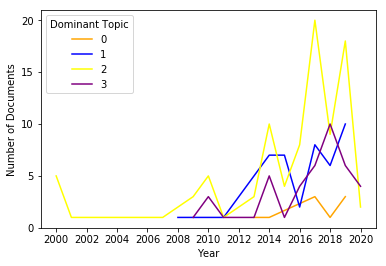

In [20]:
plot=sns.lineplot(data=df_dominant_topic_in_each_doc2, x='Year', y='count', hue='Dominant_Topic', palette=['orange', 'blue', 'yellow', 'purple'], legend=False)
plot.set(xlabel='Year', ylabel='Number of Documents')
plt.setp(plot, yticks=[0, 5, 10, 15, 20])
plt.setp(plot, xticks=[2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])

plt.legend(title='Dominant Topic', loc='upper left', labels=['0', '1', '2', '3'])
plt.show(plot)

In [21]:
df_dominant_topic50=df_dominant_topic
df_dominant_topic50['Year']= df1['Article_date']
df_dominant_topic50.sort_values(by=['Year'],inplace=True, ascending=True)
df_dominant_topic50['Year'] =  pd.to_datetime(df_dominant_topic50['Year'], format='%B %Y', errors='coerce').dt.year
df_dominant_topic51=df_dominant_topic50.drop([18, 10, 2, 17])
df_dominant_topic51.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Year
119,119,2.0,0.9820,"value, company, new, service, healthcare, health, provider, system, example, datum","[growth, major, change, strong, value_creation, potential, healthcare, exciting, industry, time,...",2009.0
146,146,3.0,0.4466,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[diagnostic, pre, non, healthcare, professional, account, almost, percent, project, profit_pool,...",2014.0
89,89,3.0,0.5052,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[die, year, world, complication, arise, pregnancy, majority, death, occur, largely, preventable,...",2016.0
87,87,3.0,0.5281,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[delivery, health, care, particularly, develop, country, offer, insight, tackle, rise, cost, est...",2017.0
50,50,2.0,0.5232,"value, company, new, service, healthcare, health, provider, system, example, datum","[person, work, retail, industry, productivity, low, several, barrier, prevent, efficient, boost,...",2017.0
49,49,2.0,0.6037,"value, company, new, service, healthcare, health, provider, system, example, datum","[company, rarely, compete, price, require, consumer, amass, substantial, saving, afford, single,...",2017.0
137,137,1.0,0.9937,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[affordable, care, first, individual, market, close, conduct, fifth, individual, market, evolve,...",2018.0
139,139,1.0,0.8355,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[enrollment, project, grow, life, end, period, manage, expect, cover, enrollee, exhibit, diverse...",2018.0
143,143,2.0,0.7901,"value, company, new, service, healthcare, health, provider, system, example, datum","[health, insurance, industry, continue, define, uncertainty, increasingly, look, uncertainty, st...",2019.0
144,144,2.0,0.5752,"value, company, new, service, healthcare, health, provider, system, example, datum","[past, year, company, respond, sustained, healthcare, cost, pressure, adopt, number, significant...",2019.0


In [22]:
df2014=df_dominant_topic51[df_dominant_topic51['Year']==2014.0]
df2015=df_dominant_topic51[df_dominant_topic51['Year']==2015.0]
df2016=df_dominant_topic51[df_dominant_topic51['Year']==2016.0]
df2017=df_dominant_topic51[df_dominant_topic51['Year']==2017.0]
df2018=df_dominant_topic51[df_dominant_topic51['Year']==2018.0]
df2019=df_dominant_topic51[df_dominant_topic51['Year']==2019.0]

In [23]:
data_ready2014 = process_words(df2014['Text'])
data_ready2014

[['diagnostic',
  'professional',
  'account',
  'almost',
  'percent',
  'project',
  'accord',
  'mckinsey',
  'research',
  'big',
  'picture',
  'look',
  'closely',
  'important',
  'detail',
  'become',
  'apparent',
  'healthcare',
  'environment',
  'change',
  'different',
  'segment',
  'likely',
  'deliver',
  'sharply',
  'different',
  'profit',
  'outcome',
  'exhibit',
  'trend',
  'particular',
  'utilization',
  'reimbursement',
  'efficiency',
  'shape',
  'future',
  'shift',
  'consumer',
  'preference',
  'technology',
  'payer',
  'imperative',
  'redirect',
  'care',
  'low',
  'cost',
  'set',
  'utilization',
  'rate',
  'different',
  'healthcare',
  'provider',
  'segment',
  'change',
  'example',
  'utilization',
  'urgent',
  'care',
  'center',
  'increase',
  'dramatically',
  'commercial',
  'population',
  'exhibit',
  'payer',
  'encourage',
  'trend',
  'design',
  'insurance',
  'product',
  'benefit',
  'namely',
  'reduce',
  'pocket',
  'cost',
 

In [24]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready2014 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, counter[word]])

df2014 = pd.DataFrame(out, columns=['word', 'word_count'])

In [25]:
df2014['Total Words']=res = len([ele for sub in data_ready2014 for ele in sub])
df2014['Word Percentage']=((df2014['word_count'])/(df2014['Total Words']))*100
df2014['Year']='2014'
df2014

,word,word_count,Total Words,Word Percentage,Year
0,lean,25,11703,0.213620,2014
1,people,21,11703,0.179441,2014
2,time,54,11703,0.461420,2014
3,work,28,11703,0.239255,2014
4,company,92,11703,0.786123,2014
5,leadership,6,11703,0.051269,2014
6,woman,13,11703,0.111083,2014
7,customer,38,11703,0.324703,2014
8,look,14,11703,0.119627,2014
9,year,48,11703,0.410151,2014


In [26]:
data_ready2015 = process_words(df2015['Text'])
data_ready2015

[['first',
  'provide',
  'early',
  'insight',
  'new',
  'exchange',
  'individual',
  'market',
  'consumer',
  'eligible',
  'population',
  'yet',
  'enrol',
  'mmore',
  'individual',
  'select',
  'plan',
  'exchange',
  'perceive',
  'affordability',
  'major',
  'force',
  'keep',
  'consumer',
  'sideline',
  'especially',
  'consumer',
  'eligibility',
  'fact',
  'price',
  'emerge',
  'lead',
  'driver',
  'consumer',
  'choice',
  'factor',
  'access',
  'prefer',
  'physician',
  'play',
  'important',
  'role',
  'shape'],
 ['closely',
  'examine',
  'new',
  'individual',
  'exchange',
  'market',
  'landscape',
  'several',
  'perspective',
  'carrier',
  'offer',
  'product',
  'price',
  'point',
  'composition',
  'hospital',
  'network',
  'product',
  'consumer',
  'initial',
  'exchange',
  'product',
  'offer',
  'examine',
  'benefit',
  'design',
  'deductible',
  'maximum',
  'pocket',
  'new',
  'exchange',
  'product',
  'potential',
  'impact',
  'consume

In [27]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready2015 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, counter[word]])

df2015 = pd.DataFrame(out, columns=['word', 'word_count'])

In [28]:
df2015['Total Words']=res = len([ele for sub in data_ready2015 for ele in sub])
df2015['Word Percentage']=((df2015['word_count'])/(df2015['Total Words']))*100
df2015['Year']='2015'
df2015

,word,word_count,Total Words,Word Percentage,Year
0,lean,0,2760,0.000000,2015
1,people,9,2760,0.326087,2015
2,time,13,2760,0.471014,2015
3,work,1,2760,0.036232,2015
4,company,8,2760,0.289855,2015
5,leadership,12,2760,0.434783,2015
6,woman,0,2760,0.000000,2015
7,customer,1,2760,0.036232,2015
8,look,1,2760,0.036232,2015
9,year,29,2760,1.050725,2015


In [29]:
data_ready2016 = process_words(df2016['Text'])
data_ready2016

[['arise',
  'pregnancy',
  'death',
  'occur',
  'largely',
  'preventable',
  'represent',
  'tragedy',
  'play',
  'day',
  'continent',
  'system',
  'underfunded',
  'overwhelm',
  'thus',
  'fragile',
  'fragmented',
  'deliver',
  'require',
  'level',
  'quality',
  'care',
  'consequently',
  'countrie',
  'struggle',
  'development',
  'goal',
  'reduce',
  'maternal',
  'nonetheless',
  'country',
  'recent',
  'work',
  'example',
  'suggest',
  'coordinate',
  'target',
  'intervention',
  'lead',
  'local',
  'stakeholder',
  'accelerate',
  'key',
  'work',
  'local',
  'health',
  'leader',
  'develop',
  'solution',
  'improve',
  'quality',
  'health',
  'care',
  'increase',
  'access',
  'promote',
  'early',
  'uptake',
  'result',
  'intervention',
  'pursue',
  'practical',
  'improvement',
  'train',
  'cheap',
  'design',
  'shipping',
  'container',
  'operational',
  'fix',
  'reduce',
  'ambulance',
  'response',
  'time',
  'radio',
  'talk',
  'educate',
 

In [30]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready2016 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, counter[word]])

df2016 = pd.DataFrame(out, columns=['word', 'word_count'])

In [31]:
df2016['Total Words']=res = len([ele for sub in data_ready2016 for ele in sub])
df2016['Word Percentage']=((df2016['word_count'])/(df2016['Total Words']))*100
df2016['Year']='2016'
df2016

,word,word_count,Total Words,Word Percentage,Year
0,lean,1,15580,0.006418,2016
1,people,25,15580,0.160462,2016
2,time,70,15580,0.449294,2016
3,work,40,15580,0.256739,2016
4,company,99,15580,0.635430,2016
5,leadership,14,15580,0.089859,2016
6,woman,21,15580,0.134788,2016
7,customer,64,15580,0.410783,2016
8,look,24,15580,0.154044,2016
9,year,40,15580,0.256739,2016


In [32]:
data_ready2017 = process_words(df2017['Text'])
data_ready2017

[['delivery',
  'health',
  'care',
  'particularly',
  'develop',
  'country',
  'offer',
  'insight',
  'rise',
  'cost',
  'estimate',
  'year',
  'globally',
  'health',
  'care',
  'escalate',
  'share',
  'income',
  'develop',
  'develop',
  'nation',
  'alike',
  'yet',
  'innovator',
  'find',
  'way',
  'deliver',
  'care',
  'effectively',
  'significantly',
  'low',
  'cost',
  'improve',
  'access',
  'increase',
  'quality',
  'uncovering',
  'pattern',
  'raise',
  'productivity',
  'leader',
  'health',
  'sector',
  'public',
  'private',
  'social',
  'heed',
  'recent',
  'passage',
  'health',
  'reform',
  'legislation',
  'instance',
  'tackle',
  'cost',
  'imperative',
  'important',
  'goal',
  'part',
  'world',
  'new',
  'approach',
  'delivery',
  'example',
  'service',
  'available',
  'subscriber',
  'family',
  'month',
  'pay',
  'phone',
  'bill',
  'prove',
  'high',
  'quality',
  'frill',
  'maternity',
  'care',
  'provide',
  'fifth',
  'price',


In [33]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready2017 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, counter[word]])

df2017 = pd.DataFrame(out, columns=['word', 'word_count'])

In [34]:
df2017['Total Words']=res = len([ele for sub in data_ready2017 for ele in sub])
df2017['Word Percentage']=((df2017['word_count'])/(df2017['Total Words']))*100
df2017['Year']='2017'
df2017

,word,word_count,Total Words,Word Percentage,Year
0,lean,15,22841,0.065671,2017
1,people,53,22841,0.232039,2017
2,time,88,22841,0.385272,2017
3,work,80,22841,0.350247,2017
4,company,125,22841,0.547262,2017
5,leadership,21,22841,0.091940,2017
6,woman,2,22841,0.008756,2017
7,customer,37,22841,0.161989,2017
8,look,23,22841,0.100696,2017
9,year,43,22841,0.188258,2017


In [35]:
data_ready2018 = process_words(df2018['Text'])
data_ready2018

[['affordable',
  'care',
  'first',
  'individual',
  'market',
  'close',
  'conduct',
  'fifth',
  'individual',
  'market',
  'evolve',
  'conduct',
  'first',
  'survey',
  'survey',
  'survey',
  'focus',
  'consumer',
  'especially',
  'report',
  'shop',
  'evaluate',
  'various',
  'plan',
  'decide',
  'uninsured',
  'survey',
  'explore',
  'consumer',
  'awareness',
  'aca',
  'requirement',
  'provision',
  'include',
  'potential',
  'subsidy',
  'penalty',
  'factor',
  'influence',
  'action',
  'survey',
  'include',
  'consumer',
  'report',
  'exist',
  'plan',
  'report',
  'shop',
  'shop',
  'finding',
  'reflect',
  'individual',
  'insurance',
  'marketplace',
  'discuss',
  'find',
  'directly',
  'compare',
  'exchange',
  'enrollment',
  'furthermore',
  'base',
  'finding',
  'respondent',
  'describe',
  'behavior',
  'attitude',
  'demographic',
  'description',
  'naturally',
  'include',
  'subjectivity',
  'nevertheless',
  'size',
  'sample',
  'respon

In [36]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready2018 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, counter[word]])

df2018 = pd.DataFrame(out, columns=['word', 'word_count'])

In [37]:
df2018['Total Words']=res = len([ele for sub in data_ready2018 for ele in sub])
df2018['Word Percentage']=((df2018['word_count'])/(df2018['Total Words']))*100
df2018['Year']='2018'
df2018

,word,word_count,Total Words,Word Percentage,Year
0,lean,0,14926,0.000000,2018
1,people,60,14926,0.401983,2018
2,time,73,14926,0.489079,2018
3,work,49,14926,0.328286,2018
4,company,31,14926,0.207691,2018
5,leadership,54,14926,0.361785,2018
6,woman,1,14926,0.006700,2018
7,customer,22,14926,0.147394,2018
8,look,33,14926,0.221091,2018
9,year,56,14926,0.375184,2018


In [38]:
data_ready2019 = process_words(df2019['Text'])
data_ready2019

[['health',
  'insurance',
  'industry',
  'continue',
  'define',
  'uncertainty',
  'increasingly',
  'look',
  'uncertainty',
  'stay',
  'least',
  'next',
  'several',
  'year',
  'promise',
  'regulatory',
  'policy',
  'change',
  'potential',
  'significantly',
  'alter',
  'new',
  'model',
  'care',
  'delivery',
  'retail',
  'site',
  'care',
  'virtual',
  'visit',
  'challenge',
  'centrality',
  'traditional',
  'institution',
  'datum',
  'become',
  'accessible',
  'new',
  'technology',
  'analytic',
  'capability',
  'upset',
  'old',
  'way',
  'business',
  'continue',
  'technology',
  'provide',
  'new',
  'fuel',
  'disruption',
  'shift',
  'risk',
  'value',
  'base',
  'care',
  'continue',
  'sign',
  'point',
  'continue',
  'industry',
  'uncertainty',
  'pace',
  'transformation',
  'remain',
  'unclear',
  'disruption',
  'healthcare',
  'remain',
  'fundamentally',
  'important',
  'society',
  'core',
  'theme',
  'remain',
  'relevant',
  'regardless'

In [39]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready2019 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, counter[word]])

df2019 = pd.DataFrame(out, columns=['word', 'word_count'])

In [40]:
df2019['Total Words']=res = len([ele for sub in data_ready2019 for ele in sub])
df2019['Word Percentage']=((df2019['word_count'])/(df2019['Total Words']))*100
df2019['Year']='2019'
df2019

,word,word_count,Total Words,Word Percentage,Year
0,lean,8,36468,0.021937,2019
1,people,95,36468,0.260502,2019
2,time,150,36468,0.411320,2019
3,work,131,36468,0.359219,2019
4,company,134,36468,0.367445,2019
5,leadership,32,36468,0.087748,2019
6,woman,105,36468,0.287924,2019
7,customer,64,36468,0.175496,2019
8,look,50,36468,0.137107,2019
9,year,96,36468,0.263244,2019


In [41]:
df2014topic0=df2014[:10]
df2014topic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,25,11703,0.213620,2014
1,people,21,11703,0.179441,2014
2,time,54,11703,0.461420,2014
3,work,28,11703,0.239255,2014
4,company,92,11703,0.786123,2014
5,leadership,6,11703,0.051269,2014
6,woman,13,11703,0.111083,2014
7,customer,38,11703,0.324703,2014
8,look,14,11703,0.119627,2014
9,year,48,11703,0.410151,2014


In [42]:
df2014topic1=df2014[10:20]
df2014topic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,39,11703,0.333248,2014
11,consumer,50,11703,0.427241,2014
12,market,105,11703,0.897206,2014
13,contract,2,11703,0.017090,2014
14,year,48,11703,0.410151,2014
15,network,6,11703,0.051269,2014
16,exhibit,27,11703,0.230710,2014
17,state,19,11703,0.162352,2014
18,performance,44,11703,0.375972,2014
19,rating,0,11703,0.000000,2014


In [43]:
df2014topic2=df2014[20:30]
df2014topic2

,word,word_count,Total Words,Word Percentage,Year
20,value,40,11703,0.341793,2014
21,company,92,11703,0.786123,2014
22,new,73,11703,0.623772,2014
23,service,57,11703,0.487055,2014
24,healthcare,62,11703,0.529779,2014
25,health,144,11703,1.230454,2014
26,provider,86,11703,0.734854,2014
27,system,71,11703,0.606682,2014
28,example,70,11703,0.598137,2014
29,datum,40,11703,0.341793,2014


In [44]:
df2014topic3=df2014[30:40]
df2014topic3

,word,word_count,Total Words,Word Percentage,Year
30,care,135,11703,1.153550,2014
31,patient,104,11703,0.888661,2014
32,health,144,11703,1.230454,2014
33,system,71,11703,0.606682,2014
34,hospital,39,11703,0.333248,2014
35,provider,86,11703,0.734854,2014
36,clinical,17,11703,0.145262,2014
37,case,12,11703,0.102538,2014
38,quality,19,11703,0.162352,2014
39,cost,99,11703,0.845937,2014


In [45]:
df2015topic0=df2015[:10]
df2015topic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,0,2760,0.000000,2015
1,people,9,2760,0.326087,2015
2,time,13,2760,0.471014,2015
3,work,1,2760,0.036232,2015
4,company,8,2760,0.289855,2015
5,leadership,12,2760,0.434783,2015
6,woman,0,2760,0.000000,2015
7,customer,1,2760,0.036232,2015
8,look,1,2760,0.036232,2015
9,year,29,2760,1.050725,2015


In [46]:
df2015topic1=df2015[10:20]
df2015topic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,48,2760,1.739130,2015
11,consumer,23,2760,0.833333,2015
12,market,38,2760,1.376812,2015
13,contract,31,2760,1.123188,2015
14,year,29,2760,1.050725,2015
15,network,30,2760,1.086957,2015
16,exhibit,12,2760,0.434783,2015
17,state,9,2760,0.326087,2015
18,performance,18,2760,0.652174,2015
19,rating,25,2760,0.905797,2015


In [47]:
df2015topic2=df2015[20:30]
df2015topic2

,word,word_count,Total Words,Word Percentage,Year
20,value,19,2760,0.688406,2015
21,company,8,2760,0.289855,2015
22,new,20,2760,0.724638,2015
23,service,10,2760,0.362319,2015
24,healthcare,3,2760,0.108696,2015
25,health,25,2760,0.905797,2015
26,provider,5,2760,0.181159,2015
27,system,23,2760,0.833333,2015
28,example,11,2760,0.398551,2015
29,datum,10,2760,0.362319,2015


In [48]:
df2015topic3=df2015[30:40]
df2015topic3

,word,word_count,Total Words,Word Percentage,Year
30,care,21,2760,0.760870,2015
31,patient,19,2760,0.688406,2015
32,health,25,2760,0.905797,2015
33,system,23,2760,0.833333,2015
34,hospital,23,2760,0.833333,2015
35,provider,5,2760,0.181159,2015
36,clinical,8,2760,0.289855,2015
37,case,9,2760,0.326087,2015
38,quality,8,2760,0.289855,2015
39,cost,15,2760,0.543478,2015


In [49]:
df2016topic0=df2016[:10]
df2016topic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,1,15580,0.006418,2016
1,people,25,15580,0.160462,2016
2,time,70,15580,0.449294,2016
3,work,40,15580,0.256739,2016
4,company,99,15580,0.635430,2016
5,leadership,14,15580,0.089859,2016
6,woman,21,15580,0.134788,2016
7,customer,64,15580,0.410783,2016
8,look,24,15580,0.154044,2016
9,year,40,15580,0.256739,2016


In [50]:
df2016topic1=df2016[10:20]
df2016topic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,38,15580,0.243902,2016
11,consumer,93,15580,0.596919,2016
12,market,117,15580,0.750963,2016
13,contract,2,15580,0.012837,2016
14,year,40,15580,0.256739,2016
15,network,13,15580,0.083440,2016
16,exhibit,47,15580,0.301669,2016
17,state,47,15580,0.301669,2016
18,performance,62,15580,0.397946,2016
19,rating,4,15580,0.025674,2016


In [51]:
df2016topic2=df2016[20:30]
df2016topic2

,word,word_count,Total Words,Word Percentage,Year
20,value,46,15580,0.295250,2016
21,company,99,15580,0.635430,2016
22,new,55,15580,0.353017,2016
23,service,49,15580,0.314506,2016
24,healthcare,13,15580,0.083440,2016
25,health,221,15580,1.418485,2016
26,provider,110,15580,0.706033,2016
27,system,165,15580,1.059050,2016
28,example,94,15580,0.603338,2016
29,datum,38,15580,0.243902,2016


In [52]:
df2016topic3=df2016[30:40]
df2016topic3

,word,word_count,Total Words,Word Percentage,Year
30,care,118,15580,0.757381,2016
31,patient,126,15580,0.808729,2016
32,health,221,15580,1.418485,2016
33,system,165,15580,1.059050,2016
34,hospital,42,15580,0.269576,2016
35,provider,110,15580,0.706033,2016
36,clinical,34,15580,0.218228,2016
37,case,25,15580,0.160462,2016
38,quality,20,15580,0.128370,2016
39,cost,116,15580,0.744544,2016


In [53]:
df2017topic0=df2017[:10]
df2017topic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,15,22841,0.065671,2017
1,people,53,22841,0.232039,2017
2,time,88,22841,0.385272,2017
3,work,80,22841,0.350247,2017
4,company,125,22841,0.547262,2017
5,leadership,21,22841,0.091940,2017
6,woman,2,22841,0.008756,2017
7,customer,37,22841,0.161989,2017
8,look,23,22841,0.100696,2017
9,year,43,22841,0.188258,2017


In [54]:
df2017topic1=df2017[10:20]
df2017topic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,92,22841,0.402784,2017
11,consumer,78,22841,0.341491,2017
12,market,134,22841,0.586664,2017
13,contract,31,22841,0.135721,2017
14,year,43,22841,0.188258,2017
15,network,101,22841,0.442187,2017
16,exhibit,46,22841,0.201392,2017
17,state,48,22841,0.210148,2017
18,performance,121,22841,0.529749,2017
19,rating,5,22841,0.021890,2017


In [55]:
df2017topic2=df2017[20:30]
df2017topic2

,word,word_count,Total Words,Word Percentage,Year
20,value,174,22841,0.761788,2017
21,company,125,22841,0.547262,2017
22,new,85,22841,0.372138,2017
23,service,126,22841,0.551640,2017
24,healthcare,70,22841,0.306466,2017
25,health,258,22841,1.129548,2017
26,provider,247,22841,1.081389,2017
27,system,289,22841,1.265269,2017
28,example,109,22841,0.477212,2017
29,datum,68,22841,0.297710,2017


In [56]:
df2017topic3=df2017[30:40]
df2017topic3

,word,word_count,Total Words,Word Percentage,Year
30,care,261,22841,1.142682,2017
31,patient,212,22841,0.928156,2017
32,health,258,22841,1.129548,2017
33,system,289,22841,1.265269,2017
34,hospital,134,22841,0.586664,2017
35,provider,247,22841,1.081389,2017
36,clinical,76,22841,0.332735,2017
37,case,55,22841,0.240795,2017
38,quality,76,22841,0.332735,2017
39,cost,159,22841,0.696117,2017


In [57]:
df2018topic0=df2018[:10]
df2018topic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,0,14926,0.000000,2018
1,people,60,14926,0.401983,2018
2,time,73,14926,0.489079,2018
3,work,49,14926,0.328286,2018
4,company,31,14926,0.207691,2018
5,leadership,54,14926,0.361785,2018
6,woman,1,14926,0.006700,2018
7,customer,22,14926,0.147394,2018
8,look,33,14926,0.221091,2018
9,year,56,14926,0.375184,2018


In [58]:
df2018topic1=df2018[10:20]
df2018topic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,90,14926,0.602975,2018
11,consumer,81,14926,0.542677,2018
12,market,42,14926,0.281388,2018
13,contract,39,14926,0.261289,2018
14,year,56,14926,0.375184,2018
15,network,2,14926,0.013399,2018
16,exhibit,49,14926,0.328286,2018
17,state,31,14926,0.207691,2018
18,performance,56,14926,0.375184,2018
19,rating,12,14926,0.080397,2018


In [59]:
df2018topic2=df2018[20:30]
df2018topic2

,word,word_count,Total Words,Word Percentage,Year
20,value,70,14926,0.468980,2018
21,company,31,14926,0.207691,2018
22,new,48,14926,0.321586,2018
23,service,97,14926,0.649873,2018
24,healthcare,60,14926,0.401983,2018
25,health,153,14926,1.025057,2018
26,provider,93,14926,0.623074,2018
27,system,112,14926,0.750368,2018
28,example,75,14926,0.502479,2018
29,datum,44,14926,0.294788,2018


In [60]:
df2018topic3=df2018[30:40]
df2018topic3

,word,word_count,Total Words,Word Percentage,Year
30,care,238,14926,1.594533,2018
31,patient,187,14926,1.252847,2018
32,health,153,14926,1.025057,2018
33,system,112,14926,0.750368,2018
34,hospital,85,14926,0.569476,2018
35,provider,93,14926,0.623074,2018
36,clinical,65,14926,0.435482,2018
37,case,30,14926,0.200992,2018
38,quality,72,14926,0.482380,2018
39,cost,132,14926,0.884363,2018


In [61]:
df2019topic0=df2019[:10]
df2019topic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,8,36468,0.021937,2019
1,people,95,36468,0.260502,2019
2,time,150,36468,0.411320,2019
3,work,131,36468,0.359219,2019
4,company,134,36468,0.367445,2019
5,leadership,32,36468,0.087748,2019
6,woman,105,36468,0.287924,2019
7,customer,64,36468,0.175496,2019
8,look,50,36468,0.137107,2019
9,year,96,36468,0.263244,2019


In [62]:
df2019topic1=df2019[10:20]
df2019topic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,91,36468,0.249534,2019
11,consumer,289,36468,0.792476,2019
12,market,160,36468,0.438741,2019
13,contract,5,36468,0.013711,2019
14,year,96,36468,0.263244,2019
15,network,55,36468,0.150817,2019
16,exhibit,93,36468,0.255018,2019
17,state,136,36468,0.372930,2019
18,performance,79,36468,0.216628,2019
19,rating,11,36468,0.030163,2019


In [63]:
df2019topic2=df2019[20:30]
df2019topic2

,word,word_count,Total Words,Word Percentage,Year
20,value,162,36468,0.444225,2019
21,company,134,36468,0.367445,2019
22,new,202,36468,0.553910,2019
23,service,204,36468,0.559395,2019
24,healthcare,199,36468,0.545684,2019
25,health,322,36468,0.882966,2019
26,provider,208,36468,0.570363,2019
27,system,235,36468,0.644401,2019
28,example,184,36468,0.504552,2019
29,datum,175,36468,0.479873,2019


In [64]:
df2019topic3=df2019[30:40]
df2019topic3

,word,word_count,Total Words,Word Percentage,Year
30,care,346,36468,0.948777,2019
31,patient,292,36468,0.800702,2019
32,health,322,36468,0.882966,2019
33,system,235,36468,0.644401,2019
34,hospital,195,36468,0.534715,2019
35,provider,208,36468,0.570363,2019
36,clinical,68,36468,0.186465,2019
37,case,100,36468,0.274213,2019
38,quality,97,36468,0.265987,2019
39,cost,286,36468,0.784249,2019


In [65]:
dfappendtopic0=df2014topic0.append(df2015topic0)
dfappendtopic0=dfappendtopic0.append(df2016topic0)
dfappendtopic0=dfappendtopic0.append(df2017topic0)
dfappendtopic0=dfappendtopic0.append(df2018topic0)
dfappendtopic0=dfappendtopic0.append(df2019topic0)
dfappendtopic0

,word,word_count,Total Words,Word Percentage,Year
0,lean,25,11703,0.213620,2014
1,people,21,11703,0.179441,2014
2,time,54,11703,0.461420,2014
3,work,28,11703,0.239255,2014
4,company,92,11703,0.786123,2014
5,leadership,6,11703,0.051269,2014
6,woman,13,11703,0.111083,2014
7,customer,38,11703,0.324703,2014
8,look,14,11703,0.119627,2014
9,year,48,11703,0.410151,2014


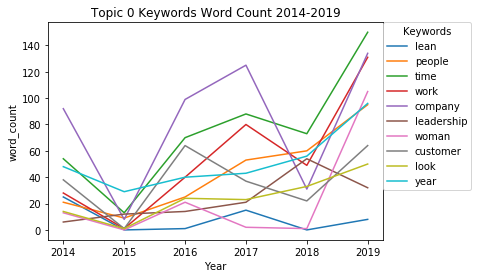

In [66]:
plotkey=sns.lineplot(data=dfappendtopic0, x='Year', y='word_count', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Count')
plt.setp(plot, yticks=[0, 100, 200, 300, 400])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 0 Keywords Word Count 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['lean', 'people', 'time', 'work', 'company', 'leadership', 'woman', 'customer', 'look', 'year'])
plt.show(plot)

In [67]:
dfappendtopic1=df2014topic1.append(df2015topic1)
dfappendtopic1=dfappendtopic1.append(df2016topic1)
dfappendtopic1=dfappendtopic1.append(df2017topic1)
dfappendtopic1=dfappendtopic1.append(df2018topic1)
dfappendtopic1=dfappendtopic1.append(df2019topic1)
dfappendtopic1

,word,word_count,Total Words,Word Percentage,Year
10,plan,39,11703,0.333248,2014
11,consumer,50,11703,0.427241,2014
12,market,105,11703,0.897206,2014
13,contract,2,11703,0.017090,2014
14,year,48,11703,0.410151,2014
15,network,6,11703,0.051269,2014
16,exhibit,27,11703,0.230710,2014
17,state,19,11703,0.162352,2014
18,performance,44,11703,0.375972,2014
19,rating,0,11703,0.000000,2014


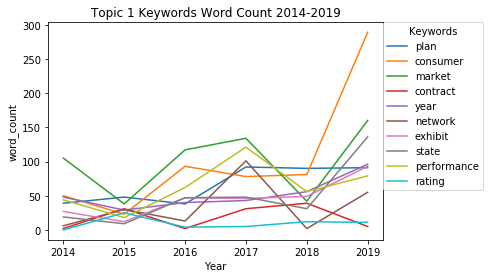

In [68]:
plotkey=sns.lineplot(data=dfappendtopic1, x='Year', y='word_count', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Count')
plt.setp(plot, yticks=[0, 100, 200, 300, 400])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 1 Keywords Word Count 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['plan', 'consumer', 'market', 'contract', 'year', 'network', 'exhibit', 'state', 'performance', 'rating'])
plt.show(plot)

In [69]:
dfappendtopic2=df2014topic2.append(df2015topic2)
dfappendtopic2=dfappendtopic2.append(df2016topic2)
dfappendtopic2=dfappendtopic2.append(df2017topic2)
dfappendtopic2=dfappendtopic2.append(df2018topic2)
dfappendtopic2=dfappendtopic2.append(df2019topic2)
dfappendtopic2

,word,word_count,Total Words,Word Percentage,Year
20,value,40,11703,0.341793,2014
21,company,92,11703,0.786123,2014
22,new,73,11703,0.623772,2014
23,service,57,11703,0.487055,2014
24,healthcare,62,11703,0.529779,2014
25,health,144,11703,1.230454,2014
26,provider,86,11703,0.734854,2014
27,system,71,11703,0.606682,2014
28,example,70,11703,0.598137,2014
29,datum,40,11703,0.341793,2014


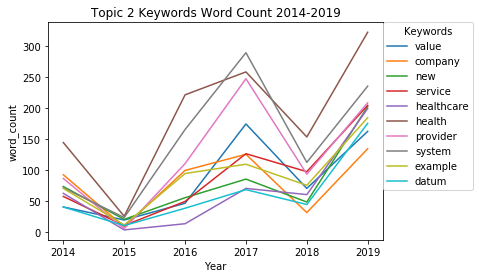

In [70]:
plotkey=sns.lineplot(data=dfappendtopic2, x='Year', y='word_count', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Count')
plt.setp(plot, yticks=[0, 100, 200, 300, 400])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 2 Keywords Word Count 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['value', 'company', 'new', 'service', 'healthcare', 'health', 'provider', 'system', 'example', 'datum'])
plt.show(plot)

In [71]:
dfappendtopic3=df2014topic3.append(df2015topic3)
dfappendtopic3=dfappendtopic3.append(df2016topic3)
dfappendtopic3=dfappendtopic3.append(df2017topic3)
dfappendtopic3=dfappendtopic3.append(df2018topic3)
dfappendtopic3=dfappendtopic3.append(df2019topic3)
dfappendtopic3

,word,word_count,Total Words,Word Percentage,Year
30,care,135,11703,1.153550,2014
31,patient,104,11703,0.888661,2014
32,health,144,11703,1.230454,2014
33,system,71,11703,0.606682,2014
34,hospital,39,11703,0.333248,2014
35,provider,86,11703,0.734854,2014
36,clinical,17,11703,0.145262,2014
37,case,12,11703,0.102538,2014
38,quality,19,11703,0.162352,2014
39,cost,99,11703,0.845937,2014


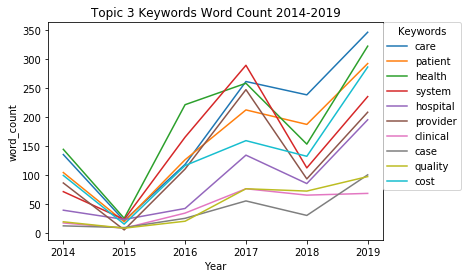

In [72]:
plotkey=sns.lineplot(data=dfappendtopic3, x='Year', y='word_count', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Count')
plt.setp(plot, yticks=[0, 100, 200, 300, 400])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 3 Keywords Word Count 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['care', 'patient', 'health', 'system', 'hospital', 'provider', 'clinical', 'case', 'quality', 'cost'])
plt.show(plot)

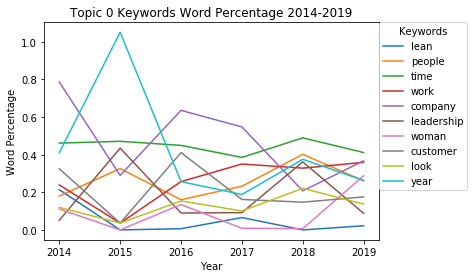

In [73]:
plotkey=sns.lineplot(data=dfappendtopic0, x='Year', y='Word Percentage', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Percentage')
plt.setp(plot, yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 0 Keywords Word Percentage 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['lean', 'people', 'time', 'work', 'company', 'leadership', 'woman', 'customer', 'look', 'year'])
plt.show(plot)

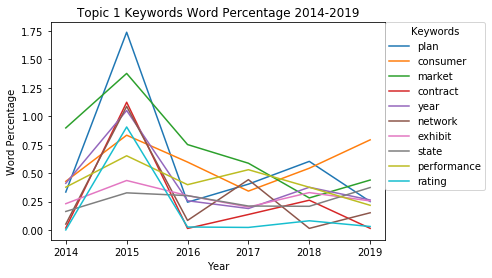

In [74]:
plotkey=sns.lineplot(data=dfappendtopic1, x='Year', y='Word Percentage', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Percentage')
plt.setp(plot, yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 1 Keywords Word Percentage 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['plan', 'consumer', 'market', 'contract', 'year', 'network', 'exhibit', 'state', 'performance', 'rating'])
plt.show(plot)

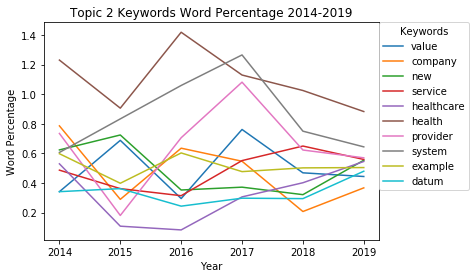

In [75]:
plotkey=sns.lineplot(data=dfappendtopic2, x='Year', y='Word Percentage', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Percentage')
plt.setp(plot, yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 2 Keywords Word Percentage 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['value', 'company', 'new', 'service', 'healthcare', 'health', 'provider', 'system', 'example', 'datum'])
plt.show(plot)

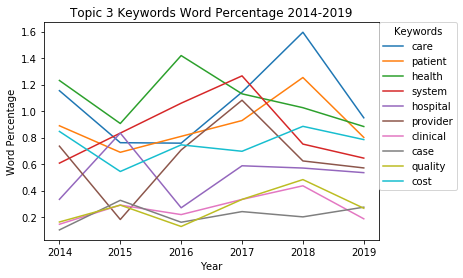

In [76]:
plotkey=sns.lineplot(data=dfappendtopic3, x='Year', y='Word Percentage', hue='word', legend=False)
plot.set(xlabel='Year', ylabel='Word Percentage')
plt.setp(plot, yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.setp(plot, xticks=[2014, 2015, 2016, 2017, 2018, 2019])
plt.title('Topic 3 Keywords Word Percentage 2014-2019')

plt.legend(title='Keywords', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., labels=['care', 'patient', 'health', 'system', 'hospital', 'provider', 'clinical', 'case', 'quality', 'cost'])
plt.show(plot)